In [22]:
# Download dataset from webpage
# import wget
# URL = "http://ovne.org/download/housing_price.csv"
# response = wget.download(URL, out="datasets/housing_price.csv")

import pandas as pd
import numpy as np

# 1. Initialize 5 original data rows
data = [
    [8450, 2003, 856, 856, 854, 2, 3, 8, 548, 1710, 60, 5, 208500],
    [9600, 1976, 1262, 1262, 0, 2, 3, 6, 460, 1262, 20, 8, 181500],
    [11250, 2001, 920, 920, 866, 2, 3, 6, 608, 1786, 60, 5, 223500],
    [9550, 1915, 756, 961, 756, 1, 3, 7, 642, 1717, 70, 5, 140000],
    [14260, 2000, 1145, 1145, 1053, 2, 4, 9, 836, 2198, 60, 5, 250000]
]

columns = [
    "LotArea", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 
    "FullBath", "BedroomAbvGr", "TotRmsAbvGrd", "GarageArea", "GrLivArea", 
    "MSSubClass", "OverallCond", "SalePrice"
]

# 2. Generate additional data until reaching 1460 rows
np.random.seed(42) # Ensure data consistency across runs
for i in range(5, 1460):
    year_built = np.random.randint(1900, 2010)
    lot_area = np.random.randint(5000, 20000)
    first_flr = np.random.randint(600, 2000)
    # 50% chance to have a second floor
    second_flr = np.random.randint(500, 1500) if np.random.random() > 0.5 else 0
    gr_liv_area = first_flr + second_flr
    full_bath = np.random.randint(1, 4)
    bedroom = np.random.randint(1, 6)
    tot_rms = bedroom + np.random.randint(2, 5)
    garage_area = np.random.randint(200, 900)
    bsmt_sf = np.random.randint(500, 1500)
    ms_subclass = np.random.choice([20, 60, 70, 50, 120])
    overall_cond = np.random.randint(3, 10)
    
    # Calculate SalePrice based on a simple formula to make data more realistic
    base_price = (gr_liv_area * 70) + (year_built - 1900) * 400 + (garage_area * 50)
    sale_price = int(base_price + np.random.randint(-20000, 20000))
    
    data.append([
        lot_area, year_built, bsmt_sf, first_flr, second_flr,
        full_bath, bedroom, tot_rms, garage_area, gr_liv_area,
        ms_subclass, overall_cond, sale_price
    ])

# 3. Create DataFrame and export to CSV
df = pd.DataFrame(data, columns=columns)
df.to_csv("datasets/housing_price.csv", index=False)
print("Đã tạo file housing_price.csv với 1460 dòng thành công!")

Đã tạo file housing_price.csv với 1460 dòng thành công!


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Read and prepare the dataset
df = pd.read_csv(
    "datasets/housing_price.csv",
    header=0,
    na_values="NA",
    comment="\t",
    sep=",",
    skipinitialspace=True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [25]:
df.head()

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000


In [26]:
# Create the feature input X and target variable Y
X = df.iloc[:,:12]
Y = df.iloc[:,12]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# Import the Decision Tree Regressor
from sklearn import tree

# Create a regressor object
regressor = tree.DecisionTreeRegressor(max_depth=3, random_state=0)

# Fit the regressor to the training data
regressor.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [29]:
# Test trained model with test set
Y_pred = regressor.predict(X_test)

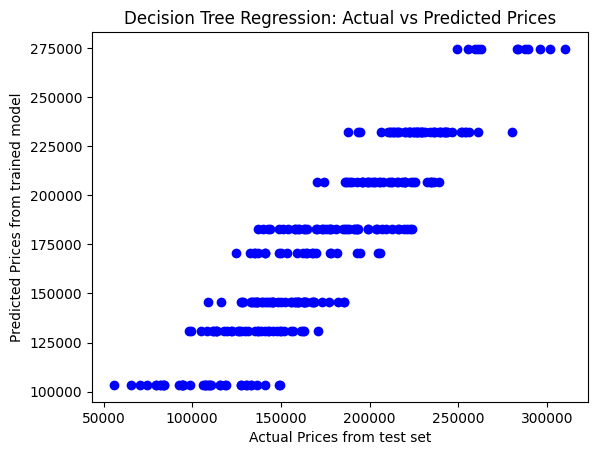

In [30]:
# Scatter plot for original data
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel("Actual Prices from test set")
plt.ylabel("Predicted Prices from trained model")
plt.title("Decision Tree Regression: Actual vs Predicted Prices")
plt.show()

## MAE: Sai sối trung bình tuyệt đối

#### Mục đích:
Đo lường hiệu suất của mô hình regression (Decision Tree Regressor) trên tập dữ liệu test. MAE là một chỉ số đánh giá phổ biến cho regression, cho biết mức độ sai lệch trung bình giữa dự đoán và thực tế (đơn vị giống như target variable, ở đây là giá nhà – ví dụ: USD).

#### Tại sao dùng MAE?
- Nó dễ hiểu: Giá trị MAE càng thấp, mô hình càng chính xác (dự đoán gần với thực tế hơn).
- Khác với Mean Squared Error (MSE), MAE không bị ảnh hưởng nặng bởi outliers (giá trị ngoại lệ), vì dùng giá trị tuyệt đối thay vì bình phương.
- Trong ví dụ này, nếu MAE là 10,000, nghĩa là trung bình mô hình sai lệch khoảng 10,000 USD so với giá thực tế.

#### Ứng dụng:
Sau khi chạy, bạn sẽ thấy output như "Mean Absolute Error (MAE) of test set is: 12345.67". So sánh với các mô hình khác hoặc điều chỉnh siêu tham số (như `max_depth`) để cải thiện.

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
err = MAE(Y_test, Y_pred)
print(f"Mean Absolute Error (MAE) of test set is: {err}")

# using MAE to evaluate the model

Mean Absolute Error (MAE) of test set is: 16960.87358225514


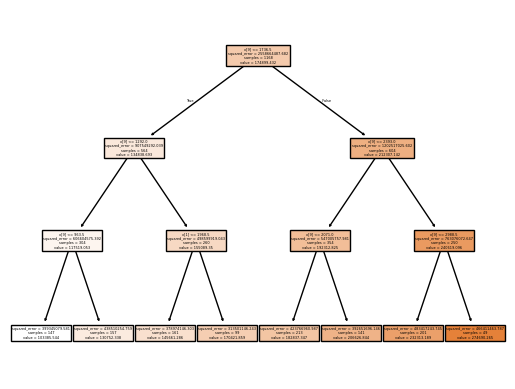

In [33]:
# from sklearn import tree
tree.plot_tree(regressor, filled=True)
plt.savefig("decision_tree_regression.pdf")
plt.show()


#### Trích xuất thông tin về mức độ quan trọng của từng đặc trưng, từ đó hiểu được mô hình dựa vào đặc trưng nào nhiều nhất để đưa ra dự đoán. Điều này hữu ích cho việc phân tích mô hình, chọn lọc đặc trưng (feature selection), hoặc tối ưu hóa dữ liệu.

In [36]:
feat_importances = regressor.feature_importances_
print("Feature importances = " + str(feat_importances))

Feature importances = [0.         0.01501416 0.         0.         0.         0.
 0.         0.         0.         0.98498584 0.         0.        ]


#### Vì nhìn vào output khi in ra, ta khó có thể nhận biết từng giá trị, nên có thể làm theo các biểu diễn dưới đây để trực quan hơn.

<Axes: >

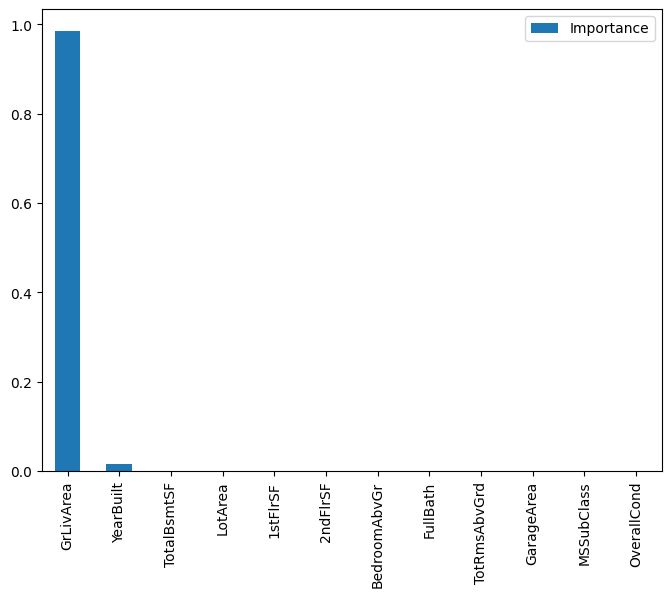

In [37]:
feat_importances = pd.DataFrame(regressor.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

Thử nghiệm hiệu suất của mô hình Decision Tree Regression với các giá trị `max_depth` khác nhau (từ 1 đến 9). Bằng cách tính MAE cho cả training và test set, bạn có thể:
- Xem xu hướng lỗi: MAE trên training thường giảm khi `max_depth` tăng (mô hình phức tạp hơn), nhưng trên test có thể tăng (overfitting).
- Chọn `max_depth` tối ưu: Giá trị làm MAE test thấp nhất mà không quá chênh lệch với training.

#### Ứng dụng:
Kết quả từ `train_err` và `test_err` thường được dùng để vẽ biểu đồ (như cell tiếp theo trong notebook), giúp trực quan hóa và quyết định siêu tham số. Điều này là bước quan trọng trong "hyperparameter tuning" để cải thiện mô hình.

In [39]:
train_err = []
test_err = []
for k, depth in enumerate(range(1,10)):
    regressor = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
    regressor.fit(X_train, Y_train)

    # Compute prices Y_pred from training set X_train
    Y_pred_train = regressor.predict(X_train)

    # Compute prices Y_pred from test set X_test
    Y_pred_test = regressor.predict(X_test)

    train_err.append(MAE(Y_train, Y_pred_train))
    test_err.append(MAE(Y_test, Y_pred_test))

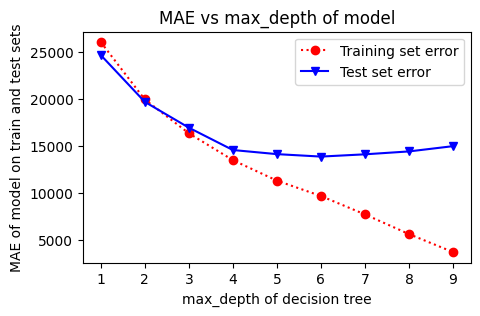

In [41]:
x = np.linspace(1,9,9)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x, train_err, "o:r", label="Training set error")
ax.plot(x, test_err, "v-b", label="Test set error")
ax.set_xlabel("max_depth of decision tree")
ax.set_ylabel("MAE of model on train and test sets")
ax.set_title("MAE vs max_depth of model")
ax.legend()
plt.show()